In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import seaborn as sns
from datetime import datetime
import warnings
from collections import defaultdict

%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
country_data_path = '../Data/country_data/'
macro_data_path = '../Data/macro_factors/'
cluster_path = '../Outputs/country_clusters/'

In [6]:
df = pd.read_csv(country_data_path+'ETF_adj_close.csv', index_col = 0)

#### function to generate correlation matrix with inputs of differnet time periods and countries

In [7]:
def corr_matrix(df, start_date = "", end_date = "", country_list = []):
    
    if start_date == "":
        start_date = df.index[0]
    if end_date == "":
        end_date = df.index[-1]
    if country_list != []:
        df = df.loc[:, country_list]
    
    df = df[ (df.index >= start_date) & (df.index <= end_date) ]
    df = (df / df.iloc[0]).pct_change().dropna()
        
    return  df.corr()

no negative correlation

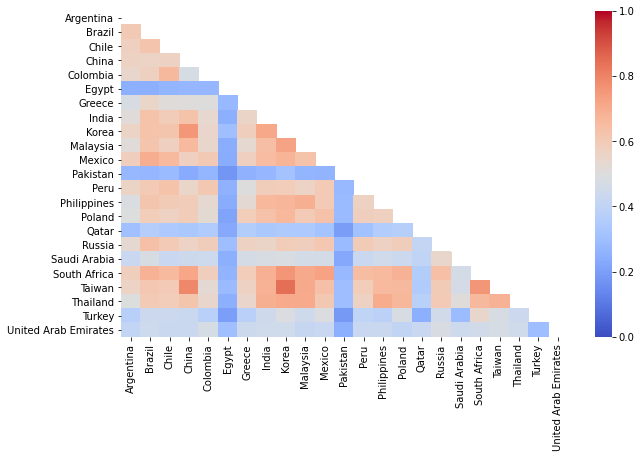

In [8]:
corr_all = corr_matrix(df, start_date = "2015-09-18")
plt.subplots(figsize=(10,6))
mask = np.triu(np.ones_like(corr_all, dtype=bool))
sns.heatmap(corr_all, mask = mask, annot = False, vmin=0, vmax=1.0, center= 0.5, cmap= 'coolwarm')
plt.show()

correlations within clusters

In [13]:
country_group1 = ["Pakistan", "Saudi Arabia", "Qatar", "Egypt", "United Arab Emirates"]
country_group2 = ["Argentina", "Greece", "South Africa", "Brazil", "Colombia"]
country_group3 = ["Thailand", "Taiwan", "Russia", "Chile", "China", "Peru", "Mexico", "Malaysia", "Korea", "India", "Poland", "Philippines"]

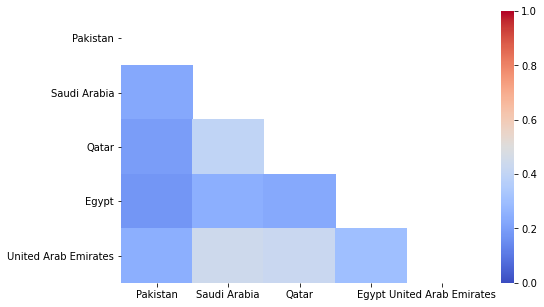

In [16]:
corr_group1 = corr_matrix(df, start_date = "2015-09-18", country_list = country_group1)
plt.subplots(figsize=(8,5))
mask = np.triu(np.ones_like(corr_group1, dtype=bool))
sns.heatmap(corr_group1, mask = mask, annot = False, vmin=0, vmax=1.0, center= 0.5, cmap= 'coolwarm')
plt.show()

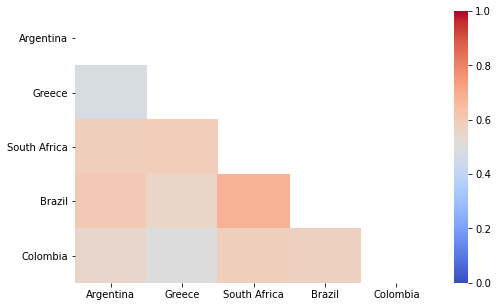

In [18]:
corr_group2 = corr_matrix(df, start_date = "2015-09-18", country_list = country_group2)
plt.subplots(figsize=(8,5))
mask = np.triu(np.ones_like(corr_group2, dtype=bool))
sns.heatmap(corr_group2, mask = mask, annot = False, vmin=0, vmax=1.0, center= 0.5, cmap= 'coolwarm')
plt.show()

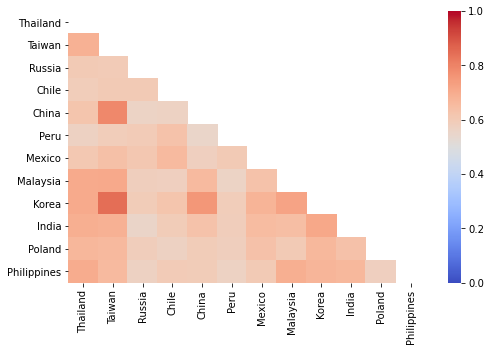

In [19]:
corr_group3 = corr_matrix(df, start_date = "2015-09-18", country_list = country_group3)
plt.subplots(figsize=(8,5))
mask = np.triu(np.ones_like(corr_group3, dtype=bool))
sns.heatmap(corr_group3, mask = mask, annot = False, vmin=0, vmax=1.0, center= 0.5, cmap= 'coolwarm')
plt.show()

correlation during different time periods

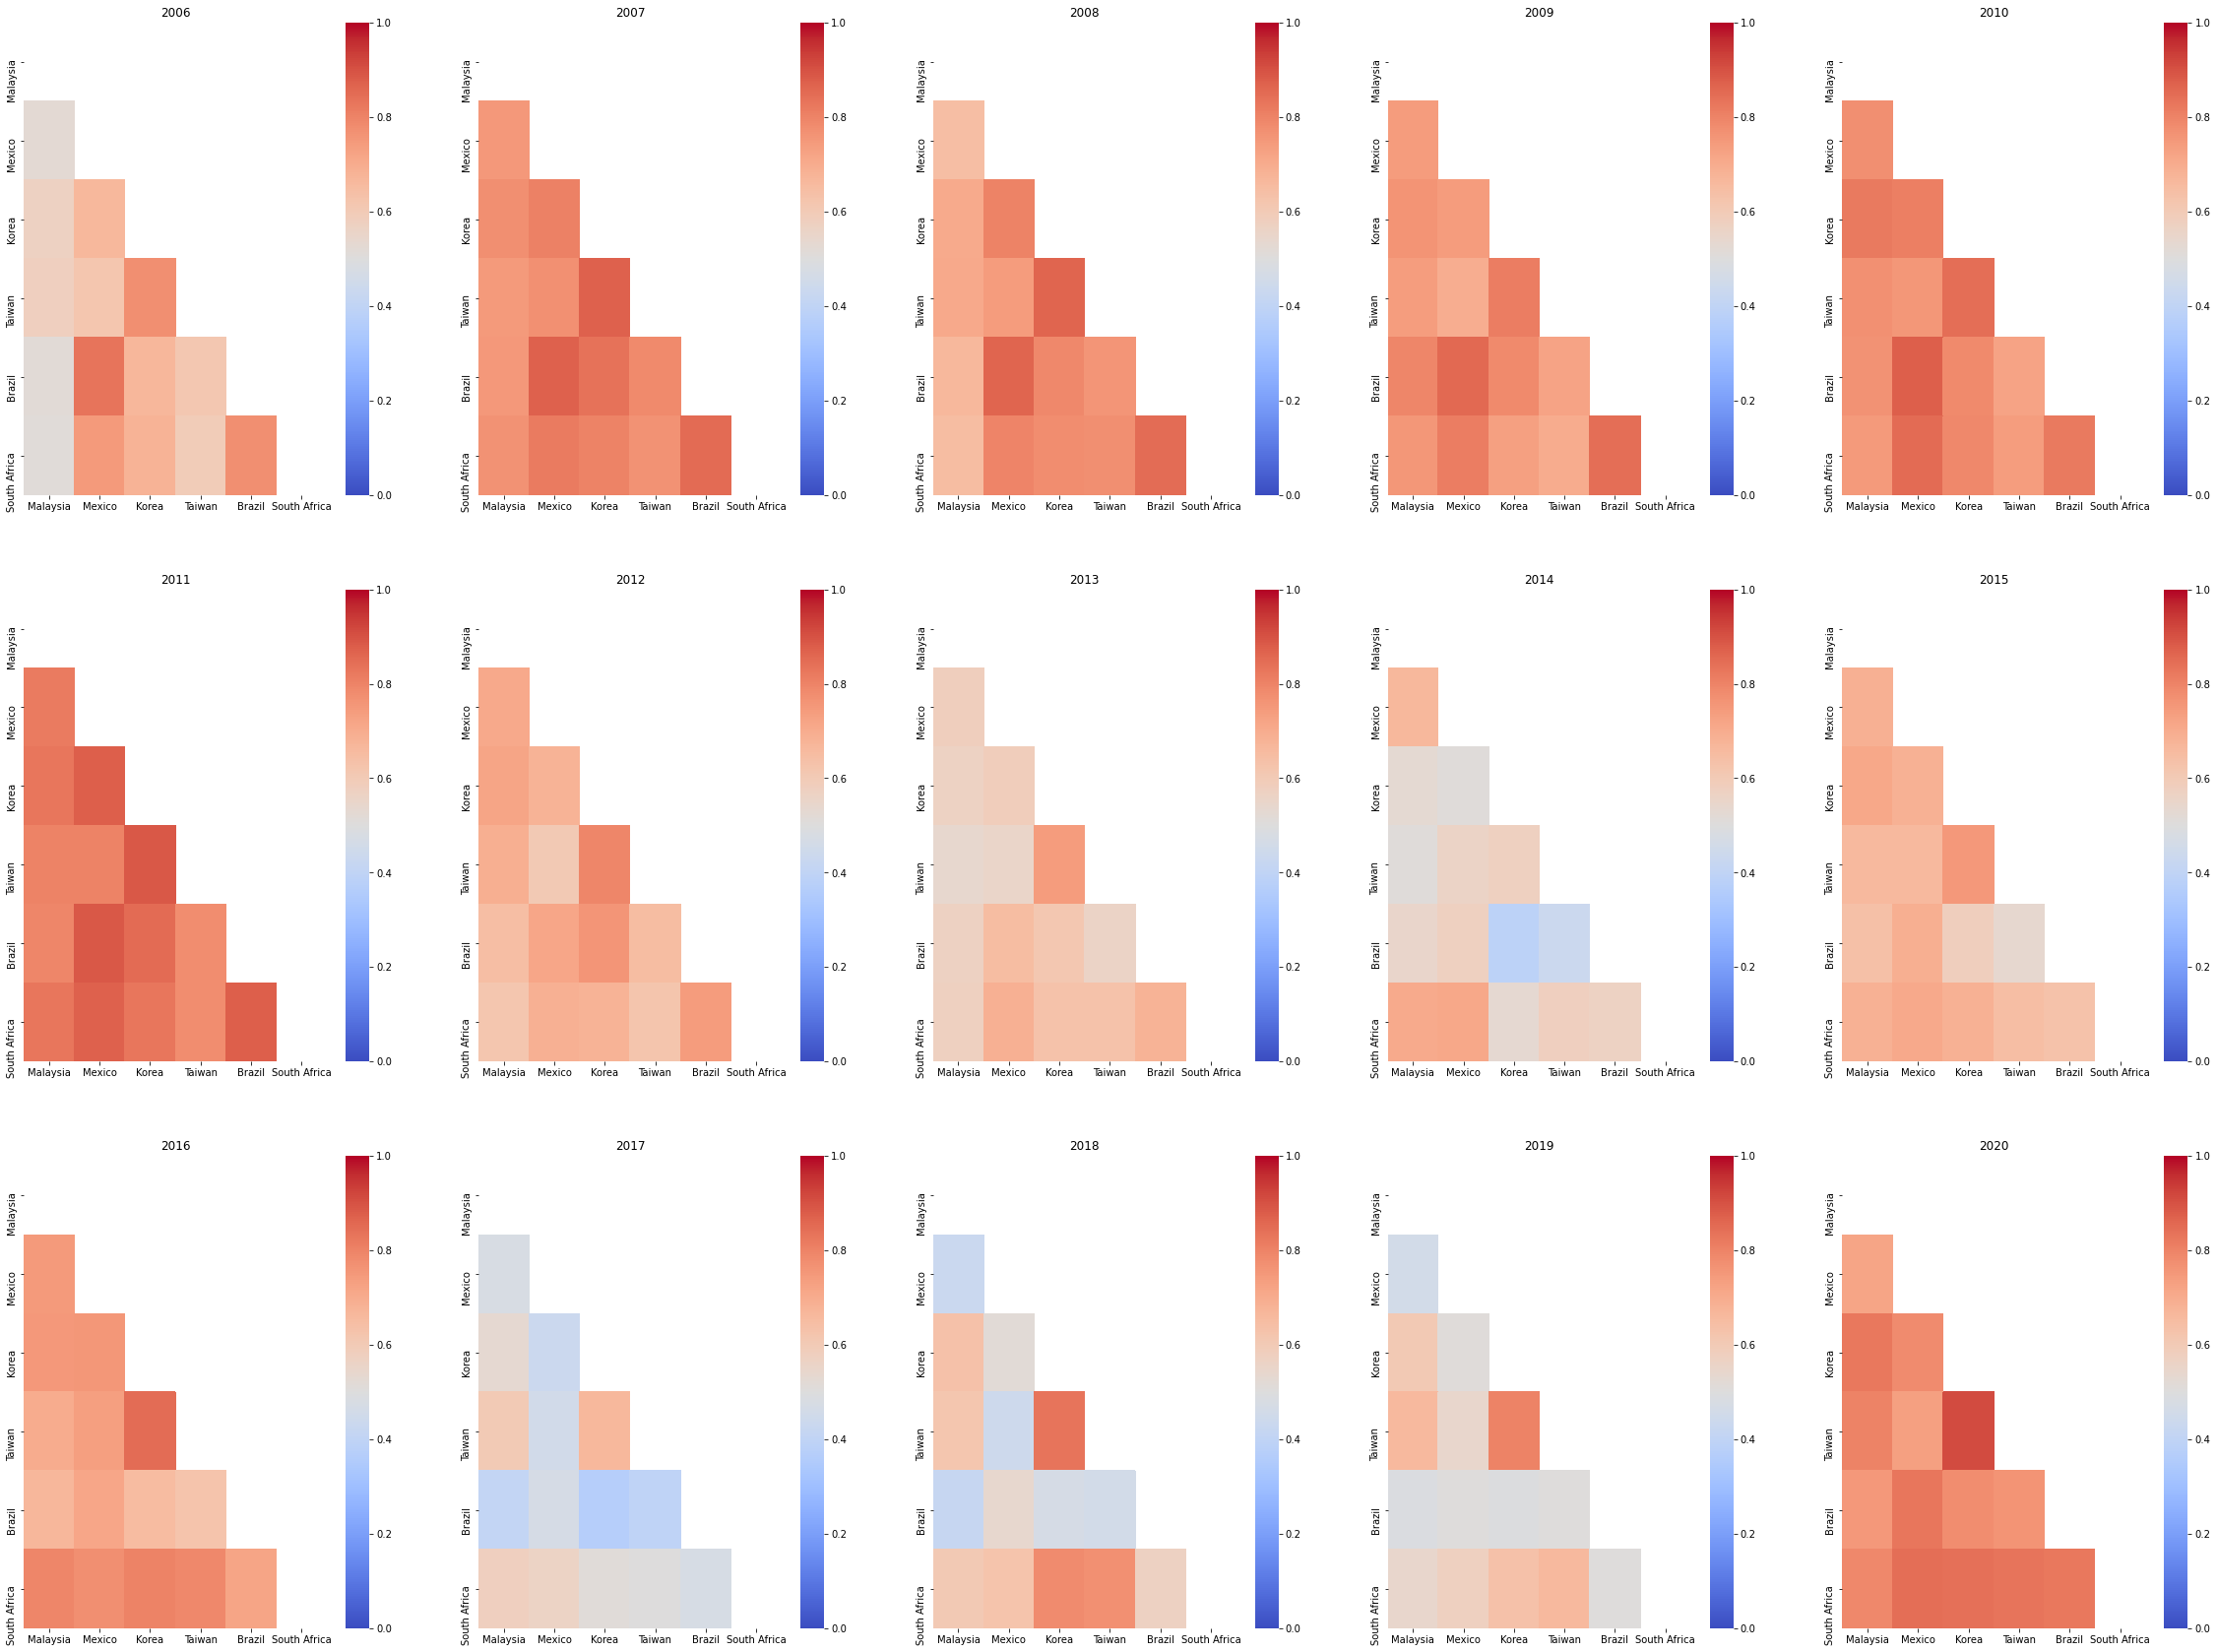

In [20]:
fig, axs = plt.subplots(3, 5, figsize=(40,30))

for y in range(2006, 2021):
    
    i = (y-2006)%5
    j = int((y-2006)/5)
    
    test = corr_matrix(df, start_date = str(y) + "-01-01", end_date = str(y) + "-12-31", country_list = ["Malaysia", "Mexico", "Korea", "Taiwan", "Brazil", "South Africa"])
    mask = np.triu(np.ones_like(test, dtype=bool))
    
    sns.heatmap(test, ax = axs[j,i], mask = mask, annot = False, vmin=0, vmax=1.0, center= 0.5, cmap= 'coolwarm')
    axs[j,i].set_title(y)

plt.show()